# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [1]:
import pandas as pd
import numpy as np
import random
def f(x):
    return np.exp(x)*np.log(x)

N=100000
u=np.random.rand(N)
np.mean(f(u))

-1.317748156492637

In [2]:
N=np.logspace(1,5,5)
table=pd.DataFrame(columns=["Aproximación"],index=N)

In [3]:
def montecarlo(f,N,a,b):
    u=np.random.uniform(a,b,N)
    return np.mean(f(u))*(b-a)

In [4]:
for i in N:
    table.loc[i,"Aproximación"]=montecarlo(f,int(i),1,3)
table

,Aproximación
10.0,6.280628
100.0,15.082885
1000.0,13.061916
10000.0,14.022135
100000.0,14.031673


In [5]:
def f2(x):
    return np.sin(x)*np.log(x)

N=100000
u=np.random.rand(N)
np.mean(f(u))

-1.3162418604138526

In [6]:
N=np.logspace(1,5,5)
table=pd.DataFrame(columns=["Aproximación"],index=N)

In [7]:
for i in N:
    table.loc[i,"Aproximación"]=montecarlo(f2,int(i),1,3)
table

,Aproximación
10.0,0.7987
100.0,0.887899
1000.0,0.872232
10000.0,0.867831
100000.0,0.868777


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

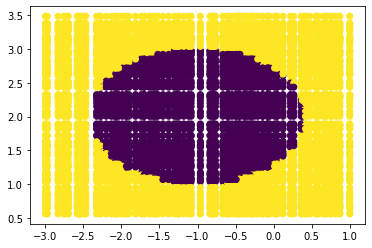

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

def bernoulli(x,y):
    return (x**2 + 2*y**2) <= (-2*x + 8*y -7)

x=np.random.uniform(-3,1,100)
y=np.random.uniform(0.5,3.5,100)
X,Y=np.meshgrid(x,y)

plt.figure()
plt.scatter(X,Y,c=~bernoulli(X,Y))

In [9]:
def montecarlo(region,ax,bx,ay,by,N):
    x=np.random.uniform(ax,bx,N)
    y=np.random.uniform(ay,by,N)
    B=region(x,y)
    AR= (bx-ax)*(by-ay)
    return np.mean(B)*AR

In [10]:
def error_relativo(AD, AR) :
    return(np.sqrt((1-AD/AR)/(AD/AR)))
AR = (1+3)*(3.5-.5)

In [11]:
N=np.logspace(1,5,5)
table=pd.DataFrame(columns=["Aproximación","Error"],index=N)

In [12]:
for i in N : 
    AD = montecarlo(bernoulli, -3, 1, 0.5, 3.5, int(i))
    table.loc[i,"Aproximación"]= montecarlo(bernoulli, -3, 1, 0.5, 3.5, int(i))
    table.loc[i,"Error"]= error_relativo(AD, AR)
table

,Aproximación,Error
10.0,2.4,1.224745
100.0,4.68,1.083473
1000.0,4.536,1.232433
10000.0,4.3524,1.292373
100000.0,4.45968,1.304261


3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

1. **Valuar instrumentos financieros con rendimientos  aleatorios (inversiones de renta variable o las inversiones en la bolsa cuyos rendimientos dependen del comportamiento de una acción o de un bien)**


La valuaciónn de estos instrumentos se reduce, al cálculo de una esperanza de una función continua de una variable aleatoria


Saavedra Barrera, P. & Ibarra Mercado, V. H. (s. f.). El método Monte-Carlo y su aplicación a finanzas. Departamento de Matemáticas, Universidad Autónoma Metropolitana-Iztapalapa,. http://mat.izt.uam.mx/mat/documentos/notas%20de%20clase/cfenaoe3.pdf

2. **Finanzas corporativas: para construir modelos financieros**
Para analizar las características del valor actual neto (VAN) de un proyecto, se modelan los componentes del flujo de caja que están fuertemente impactados por la incertidumbre , incorporando cualquier correlación entre estos, reflejando matemáticamente sus "características aleatorias".

tok.wiki. (s. f.). Métodos de Monte Carlo en finanzas Descripción generalyAplicabilidad. Recuperado 19 de octubre de 2022, de https://hmong.es/wiki/Monte_Carlo_methods_in_finance


3. **Evaluación de la cartera**

Se simula el comportamiento correlacionado de los factores que impactan en los instrumentos componentes a lo largo del tiempo, se calcula el valor resultante de cada instrumento y luego se observa el valor de la cartera.

tok.wiki. (s. f.). Métodos de Monte Carlo en finanzas Descripción generalyAplicabilidad. Recuperado 19 de octubre de 2022, de https://hmong.es/wiki/Monte_Carlo_methods_in_finance